# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team ES5**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [30]:
# Libraries for data loading, data manipulation
import pandas as pd

#Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.correlation import plot_corr


# Libraries for data preparation
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from statsmodels.distributions.empirical_distribution import ECDF       #Imported for displaying the Empirical Cumulative Distribution of Features
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import ensemble

# Libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Libraries for Model Performance
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV


#Libraries for mathematical analyses
import numpy as np


#Library for creating pickle files of the models
import pickle

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics

In [4]:
# plot relevant feature interactions

In [5]:
# evaluate correlation

In [6]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [7]:
train_df=pd.read_csv("df_train.csv")
train_df = train_df.drop(['Unnamed: 0'], axis=1)
#create a copy 
train_copy_df = train_df.copy(deep = True)
train_copy_df.head()


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


### **a. Dealing with Missing Values**

From the correlation matrix we saw early ,Madrid_pressure and Velencia_pressure are collinear. This gives more reason to replace the missing values in Valencia_pressure column with values from Madrid_pressure

In [8]:
train_copy_df['Valencia_pressure'].corr(train_copy_df['Madrid_pressure'])

0.7992719089123169

In [9]:
train_copy_df[['Madrid_pressure', 'Valencia_pressure']].describe()

,Madrid_pressure,Valencia_pressure
count,8763.000000,6695.000000
mean,1010.316920,1012.051407
std,22.198555,9.506214
min,927.666667,972.666667
25%,1012.333333,1010.333333
50%,1017.333333,1015.000000
75%,1022.000000,1018.000000
max,1038.000000,1021.666667


From the descriptive statistics ,the mean ,min and max value for both features are approximately the same. This give us more reasons to replace the missing values in Valencia_pressure with values from Madrid_pressure column

In [10]:
#Replace the null values in Valencia_pressure with Madrid_pressure values on the same row.
train_copy_df.loc[train_copy_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     train_copy_df.loc[train_copy_df['Valencia_pressure'].isna(), 'Madrid_pressure']

train_copy_df['Valencia_pressure'].isna().sum()

0

### **b. Creating New Features**

First,we will be spliting 'time' faeture  to month Day of the week, Year and Hours. These new features will give us more insight since weather vary from month to month in a year.
- Month feature will help us determine the change in energy per season
- The years feature may show a rate of change in energy supplied from renewable & fossil fuel sources.
- Hourly charts shal provide the most relevant hours of the day when load shortfalls occur.

In [11]:

# Extracting year from time column 
train_copy_df['time'] = pd.to_datetime(train_copy_df.time)
train_copy_df['year'] = train_copy_df[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
train_copy_df['month'] = train_copy_df[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)
train_copy_df['Day'] = train_copy_df[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
train_copy_df['Hours'] = train_copy_df[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)
train_copy_df.shape

(8763, 52)

In [12]:
test_df = pd.read_csv("df_test.csv")
test_df.loc[test_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     test_df.loc[test_df['Valencia_pressure'].isna(), 'Madrid_pressure']
test_df['time'] = pd.to_datetime(test_df.time)
test_df['year'] = test_df[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
test_df['month'] = test_df[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)
test_df['Day'] = test_df[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
test_df['Hours'] = test_df[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)
test_df.loc[test_df['month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
test_df.loc[test_df['month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
test_df.loc[test_df['month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
test_df.loc[test_df['month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

test_df = test_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)
test_df.shape
test_df
test_dummies = pd.get_dummies(test_df)
test_dummies.columns = [col.replace(" ","_") for col in test_dummies.columns]

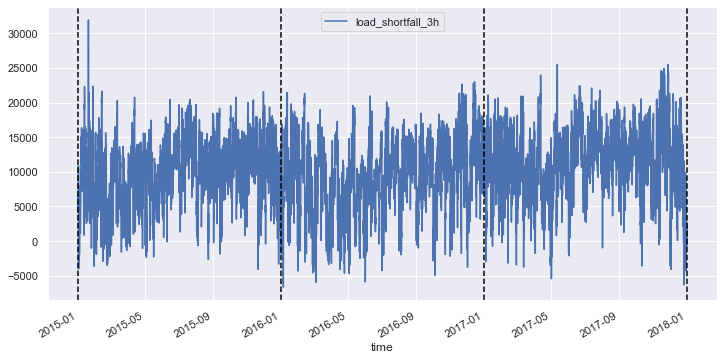

In [13]:
#seasonality
ax = train_copy_df.plot(x='time', y='load_shortfall_3h', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01']
for dt in xcoords:
    plt.axvline(x=dt, color='black', linestyle='--')

A keen eye might already see from this plot that the 3 hour load shortfall seem to dip around the new year and peak a few months before. Let’s dive a little further into this by plotting a vertical line for January of every year.


In [14]:
#Let us Create new season features 
# Between Jan-March=Winter
# Between April-June=Spring
# Between July-Sept=Summer
# Between Oct-Dec=Autumn

train_copy_df.loc[train_copy_df['month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
train_copy_df.loc[train_copy_df['month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
train_copy_df.loc[train_copy_df['month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
train_copy_df.loc[train_copy_df['month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

train_copy_df = train_copy_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)



C:\Users\kinyabeta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='load_shortfall_3h'>

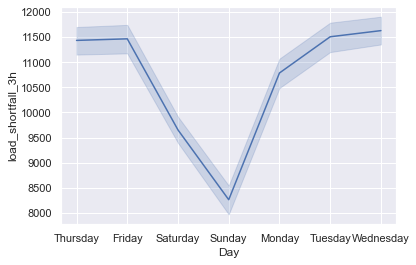

In [15]:
#Next, let’s group the 3 hour load shortfall time series by day of the week, to explore weekly seasonality.
sns.lineplot(train_copy_df['Day'], train_copy_df['load_shortfall_3h'])

Load_shortfall_3h is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.

### **c. Encoding categorical features**

we are going to use  one-hot encoding on the categorical features  to generate their dummy variables.


In [16]:
dummies_df = pd.get_dummies(train_copy_df[['Valencia_wind_deg','Seville_pressure']], drop_first = True)
train_copy_df = pd.concat([train_copy_df, dummies_df], axis='columns')
train_copy_df = train_copy_df.drop(['Valencia_wind_deg', 'Seville_pressure' ], axis='columns')



In [17]:
# Again we make sure that all the column names have underscores instead of whitespaces
train_copy_df.columns = [col.replace(" ","_") for col in train_copy_df.columns] 
train_copy_df.shape

(8763, 87)

At this point,let us  reorder the columns so that dependent variable is the last column in the dataframe

In [18]:
column_titles = [col for col in train_copy_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
train_copy_df = train_copy_df.reindex(columns = column_titles)
train_copy_df.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,0,1,0,0,0,0,0,0,0,6715.666667
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,0,1,0,0,0,0,0,0,0,4171.666667
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,0,1,0,0,0,0,0,0,0,4274.666667
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,0,1,0,0,0,0,0,0,0,5075.666667
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,0,1,0,0,0,0,0,0,0,6620.666667


### d.Feature Selection

- **SelectKBest Model**

In [19]:
train_copy_df = train_copy_df.drop(['time','Day'], axis='columns')

In [20]:
# Create x, y variable DFs
def create_x_y_features(train_copy_df = train_copy_df):
    train_df = train_copy_df.copy(deep = True)
    Y_var = train_df['load_shortfall_3h']
    X_var = train_df[[i for i in train_df if i not in 'load_shortfall_3h']]

    return train_df, Y_var , X_var


In the below function, we are using the SelectKBest library to helps determine the best 60 features in our data.
The method considers the features based their F-scores result.


In [21]:
def select_k_best(data_df):
    data_df, Y_var, X_var = create_x_y_features(data_df)
    X_train, X_test, y_train, y_test = train_test_split(X_var,
                                                        Y_var,
                                                        test_size= 0.2,
                                                        random_state=42)

    k_best = SelectKBest(score_func= f_regression, k = 60)

    k_best.fit(X_train, y_train)

    X_train_fs, X_test_fs = k_best.transform(X_train), k_best.transform(X_test)
    sns.lineplot([i for i in range(len(k_best.scores_))], k_best.scores_)
    plt.show()
    
    return k_best, X_train_fs, X_test_fs
 

C:\Users\kinyabeta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


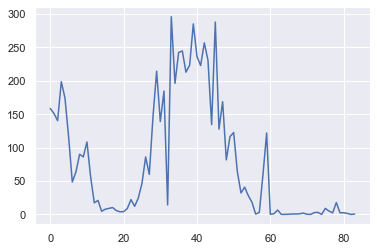

In [22]:
k_best,_,_= select_k_best(train_copy_df)

In [23]:
filter = k_best.get_support()
features = np.array([i for i in train_copy_df.columns if i not in 'load_shortfall_3h'])
 
print("All features before selection:")
print(features)
 
print("The Best 60 selected features are::")
print(features[filter])
print(k_best)

All features before selection:
['Madrid_wind_speed' 'Bilbao_rain_1h' 'Valencia_wind_speed'
 'Seville_humidity' 'Madrid_humidity' 'Bilbao_clouds_all'
 'Bilbao_wind_speed' 'Seville_clouds_all' 'Bilbao_wind_deg'
 'Barcelona_wind_speed' 'Barcelona_wind_deg' 'Madrid_clouds_all'
 'Seville_wind_speed' 'Barcelona_rain_1h' 'Seville_rain_1h'
 'Bilbao_snow_3h' 'Barcelona_pressure' 'Seville_rain_3h' 'Madrid_rain_1h'
 'Barcelona_rain_3h' 'Valencia_snow_3h' 'Madrid_weather_id'
 'Barcelona_weather_id' 'Bilbao_pressure' 'Seville_weather_id'
 'Valencia_pressure' 'Seville_temp_max' 'Madrid_pressure'
 'Valencia_temp_max' 'Valencia_temp' 'Bilbao_weather_id' 'Seville_temp'
 'Valencia_humidity' 'Valencia_temp_min' 'Barcelona_temp_max'
 'Madrid_temp_max' 'Barcelona_temp' 'Bilbao_temp_min' 'Bilbao_temp'
 'Barcelona_temp_min' 'Bilbao_temp_max' 'Seville_temp_min' 'Madrid_temp'
 'Madrid_temp_min' 'year' 'month' 'Hours' 'winter' 'spring' 'summer'
 'autumn' 'Valencia_wind_deg_level_10' 'Valencia_wind_deg_level_2'


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In this section we are going to compare the perfomace of the following three models 

1. Ordinary Linear Regression
2. Decision Trees
3. Random Forest

## 1. Ordinary Least Squares Linear Regression model

First,we will use the below function to separate our data set into features and  lables

In [24]:
# split data
# Create x, y variable DFs
def create_x_y_features(train_copy_df = train_copy_df):
    train_df = train_copy_df.copy(deep = True)
    Y_var = train_df['load_shortfall_3h']
    X_var = train_df[[i for i in train_df if i not in 'load_shortfall_3h']]

    return train_df, Y_var , X_var

We will then proceed to define the string fomular for our model which we will proceed to fit on the variables that have been selected with the help of below function:

In [25]:
def fit_ols_model(data_df = None):
    #the dependent variable 
    y_shortfall = 'load_shortfall_3h'

    #the independent variables
    x_cols = [col for col in data_df.columns if col not in ['load_shortfall_3h', 'time']]

    #build OLS formula string
    formula_str = y_shortfall + " ~ " + " + ".join(x_cols)
    # print ("Formula:\n\t {}".format(formula_str))
    print(data_df.columns)

    #fit the model using the model dataframe
    model = ols(formula = formula_str, data = data_df)
    fitted_ols_model = model.fit()
    print('OLS Model Regression report: \n \t {}'.format(fitted_ols_model.summary()))

    return fitted_ols_model


In [26]:
kbest = features[filter]
X = train_copy_df[kbest]
X #= df.drop(['load_shortfall_3h', 'time', 'year', 'month', 'Day'], axis=1)
Y = train_copy_df['load_shortfall_3h']
test = test_dummies[kbest]

In [35]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
cls=RandomForestRegressor(random_state= 42)
parameter_grid = {
    'max_depth': [10,20,30,40,50,60],
    'n_estimators' : [50, 100, 200, 250, 300, 400]
}
grid_search = GridSearchCV(estimator = cls, cv = kf, param_grid = parameter_grid)

grid_search.fit(X,Y)
grid_search.best_params_

In [32]:
# # create one or more ML models
# from sklearn.ensemble import RandomForestRegressor
# estimators = [50, 100, 200, 250, 300, 400]

# def rmse(score):
#     rmse = np.sqrt(-score)
#     print(f'rmse= {"{:.2f}".format(rmse)}')

# for count in estimators:
#     score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, Y, cv= kf, scoring="neg_mean_squared_error")
#     print(f'For estimators: {count}')
#     rmse(score.mean())
    


For estimators: 50
rmse= 4840.71
For estimators: 100
rmse= 4826.80
For estimators: 200
rmse= 4824.10
For estimators: 250
rmse= 4821.37
For estimators: 300
rmse= 4827.77
For estimators: 400
rmse= 4829.53


In [33]:
cls=RandomForestRegressor(n_estimators= 250,
                                    max_depth= 40,
                                    random_state= 42)
cls.fit(X,Y)
#cls.score(X_test,Y_test)
Y_pred = cls.predict(test)

In [34]:
Resultsdict = {'time': test_df['time'],
         'load_shortfall_3h': Y_pred}
pred_df = pd.DataFrame(data = Resultsdict)
pred_df
pred_df.to_csv("C:/Users/kinyabeta/Downloads/Team_ES5.csv", index=False)

In [ ]:
# evaluate one or more ML models
from sklearn.model_selection import KFold
help(KFold)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic